# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data

Import the necessary libraries and create your dataframe(s).

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading data
df = pd.read_csv(r"C:\Users\launchcode\data-analysis-projects\World-happiness-report-updated_2024.csv",encoding='latin1')
happy_df = pd.read_csv(r"C:\Users\launchcode\data-analysis-projects\World-happiness-report-2024.csv",encoding='latin1')
# Rename 2024 columns to match historical
happy_df = happy_df.rename(columns={
    "Ladder score": "Life Ladder",
    "Healthy life expectancy": "Healthy life expectancy at birth"
})

happy_df["year"]=2024
#information about data
df.info()
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
<class 'pa

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [26]:
df.isnull()
# no null values observed in the columns



,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2358,False,False,False,False,False,False,False,False,False,False,False
2359,False,False,False,False,False,False,False,False,False,False,False
2360,False,False,False,False,False,False,False,False,False,False,False
2361,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

 There are several other columns containing null values. These are:Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect 

In [28]:
# Find all numeric columns and replace any missing values in them with the column’s average value
numeric_cols = df.select_dtypes(include=np.number).columns

# not using the code below as that calculates the mean of the column distorting the trend
# df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill numeric NaNs with the mean per country
df[numeric_cols] = df.groupby('Country name')[numeric_cols].transform(lambda x: x.fillna(x.mean()))

# count the number of missing (NaN, None, or NaT) values in each column of a DataFrame 
df.isnull().sum()
# Round all numeric columns to 3 decimal places
df[numeric_cols] = df[numeric_cols].round(3)

# Preview the first few rows
df.head(16)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.059,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.102,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.078,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.040,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.123,0.954,0.435,0.371


Missing values in numeric variables were handled by replacing them with the column mean. This ensured no loss of data while preserving overall distributions. Non-numeric columns were left unchanged.

In [29]:
happy_df.isnull()
# no null values observed in the columns

,Country name,Regional indicator,Life Ladder,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,False,False,False,False,False,False,False,False,False,False,False,False,False
139,False,False,False,False,False,False,False,False,False,False,False,False,False
140,False,False,False,False,False,False,False,False,False,False,False,False,False
141,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
happy_df.isnull().sum()

Country name                        0
Regional indicator                  0
Life Ladder                         0
upperwhisker                        0
lowerwhisker                        0
Log GDP per capita                  3
Social support                      3
Healthy life expectancy at birth    3
Freedom to make life choices        3
Generosity                          3
Perceptions of corruption           3
Dystopia + residual                 3
year                                0
dtype: int64

In [31]:
numeric_cols = happy_df.select_dtypes(include=np.number).columns
happy_df[numeric_cols] = happy_df[numeric_cols].fillna(happy_df[numeric_cols].mean())
happy_df[numeric_cols] = happy_df[numeric_cols].round(3)
happy_df.tail(50)



,Country name,Regional indicator,Life Ladder,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,year
93,Laos,Southeast Asia,5.139,5.261,5.017,1.208,0.846,0.423,0.796,0.170,0.167,1.529,2024
94,Gabon,Sub-Saharan Africa,5.106,5.243,4.969,1.403,1.038,0.344,0.516,0.045,0.100,1.660,2024
95,Ivory Coast,Sub-Saharan Africa,5.080,5.224,4.936,1.080,0.578,0.288,0.547,0.120,0.164,2.303,2024
96,Guinea,Sub-Saharan Africa,5.023,5.166,4.881,0.831,0.622,0.236,0.521,0.210,0.107,2.497,2024
97,Turkiye,Middle East and North Africa,4.975,5.085,4.866,1.702,1.175,0.631,0.202,0.068,0.115,1.083,2024
98,Senegal,Sub-Saharan Africa,4.969,5.096,4.841,0.927,0.751,0.392,0.607,0.152,0.069,2.071,2024
99,Iran,Middle East and North Africa,4.923,5.024,4.822,1.435,1.136,0.571,0.366,0.235,0.123,1.057,2024
100,Azerbaijan,Commonwealth of Independent States,4.893,5.018,4.768,1.433,0.876,0.496,0.668,0.112,0.199,1.110,2024
101,Nigeria,Sub-Saharan Africa,4.881,5.018,4.744,1.042,1.075,0.256,0.566,0.201,0.019,1.722,2024
102,State of Palestine,Middle East and North Africa,4.879,5.006,4.753,1.379,1.134,0.521,0.621,0.146,0.154,1.576,2024


Missing values in numeric variables were handled by replacing them with the column mean. This ensured no loss of data while preserving overall distributions. Non-numeric columns were left unchanged.

In [32]:
happy_df.isnull().sum()
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      143 non-null    object 
 1   Regional indicator                143 non-null    object 
 2   Life Ladder                       143 non-null    float64
 3   upperwhisker                      143 non-null    float64
 4   lowerwhisker                      143 non-null    float64
 5   Log GDP per capita                143 non-null    float64
 6   Social support                    143 non-null    float64
 7   Healthy life expectancy at birth  143 non-null    float64
 8   Freedom to make life choices      143 non-null    float64
 9   Generosity                        143 non-null    float64
 10  Perceptions of corruption         143 non-null    float64
 11  Dystopia + residual               143 non-null    float64
 12  year    

In [33]:
print(happy_df.columns)

Index(['Country name', 'Regional indicator', 'Life Ladder', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Dystopia + residual',
       'year'],
      dtype='object')


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [34]:
# target_col = "Life Ladder"


# plt.figure(figsize=(8, 4))
# df[target_col].plot(
#     kind="hist",
#     bins=25,
#     edgecolor="black"
# )

# plt.title("Happiness Score Distribution")
# plt.xlabel(target_col)
# plt.ylabel("Count")
# plt.show()

In [35]:
target_col = "Life Ladder"

top10 = (
    df[["Country name", target_col]]
    .sort_values(target_col, ascending=False)
    .head(10)
)
bottom10 = (
    df[["Country name", target_col]]
    .sort_values(target_col, ascending=True)
    .head(10)
)
top10,bottom10

(     Country name  Life Ladder
 539       Denmark        8.019
 541       Denmark        7.971
 677       Finland        7.889
 675       Finland        7.858
 540       Denmark        7.834
 678       Finland        7.794
 674       Finland        7.788
 544       Denmark        7.788
 676       Finland        7.780
 2007  Switzerland        7.776,
       Country name  Life Ladder
 13     Afghanistan        1.281
 14     Afghanistan        1.446
 1192       Lebanon        2.179
 1193       Lebanon        2.352
 11     Afghanistan        2.375
 12     Afghanistan        2.436
 1834  Sierra Leone        2.560
 1191       Lebanon        2.634
 9      Afghanistan        2.662
 2023         Syria        2.688)

In [36]:
latest_year = df["year"].max()
df_latest = df[df["year"] == latest_year].copy()
latest_year, df_latest.shape
# target_col = "Life Ladder"

top10_2023 = (
    df_latest[["Country name", target_col]]
    .sort_values(target_col, ascending=False)
    .head(10)
)
bottom10_2023 = (
    df_latest[["Country name", target_col]]
    .sort_values(target_col, ascending=True)
    .head(10)
)
top10_2023,bottom10_2023

(     Country name  Life Ladder
 680       Finland        7.699
 886       Iceland        7.562
 556       Denmark        7.504
 490    Costa Rica        7.384
 1498  Netherlands        7.255
 1594       Norway        7.249
 2004       Sweden        7.161
 1129       Kuwait        7.130
 97      Australia        7.025
 1249   Luxembourg        7.016,
           Country name  Life Ladder
 14         Afghanistan        1.446
 1277            Malawi        3.272
 258           Botswana        3.332
 472   Congo (Kinshasa)        3.383
 1835      Sierra Leone        3.467
 2327             Yemen        3.532
 2362          Zimbabwe        3.572
 1194           Lebanon        3.588
 448            Comoros        3.588
 1964         Sri Lanka        3.602)

In [37]:
# happy_df = happy_df.copy()
# happy_df = happy_df.select_dtypes(include=["float64", "int64"])
# happy_df.head()
numeric_cols = happy_df.select_dtypes(include=["float64", "int64"]).columns

# Example: fill NaNs in numeric columns only
happy_df[numeric_cols] = happy_df[numeric_cols].fillna(happy_df[numeric_cols].mean())
happy_df

,Country name,Regional indicator,Life Ladder,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,year
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,2024
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,2024
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,2024
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,2024
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,2024
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,2024
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,2024
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,2024


In [38]:
# Check number of unique values in key columns (optional sanity check)

# happy_df.dtypes
# columns = [['Ladder score', 'Log GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
# for c in columns:
#     print(happy_df[c].nunique())

In [39]:
happy_df

,Country name,Regional indicator,Life Ladder,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,year
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,2024
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,2024
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,2024
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,2024
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,2024
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,2024
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,2024
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,2024


In [40]:
happy_df.isna().mean().sort_values(ascending=False) * 100
# percentage of missing values in each column of happy_df, sorted from highest to lowest.

Country name                        0.0
Regional indicator                  0.0
Life Ladder                         0.0
upperwhisker                        0.0
lowerwhisker                        0.0
Log GDP per capita                  0.0
Social support                      0.0
Healthy life expectancy at birth    0.0
Freedom to make life choices        0.0
Generosity                          0.0
Perceptions of corruption           0.0
Dystopia + residual                 0.0
year                                0.0
dtype: float64

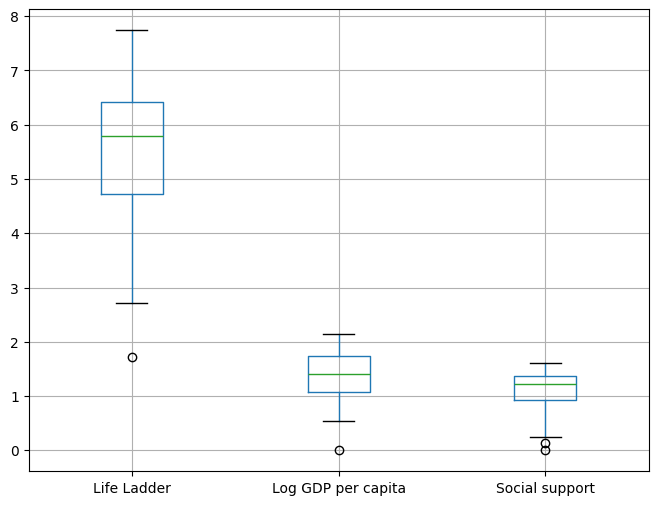

In [41]:
numeric_cols = ['Life Ladder', 'Log GDP per capita','Social support']
plt.figure(figsize=(8, 6))
happy_df[numeric_cols].boxplot()
plt.show()

social interaction also has  outliers

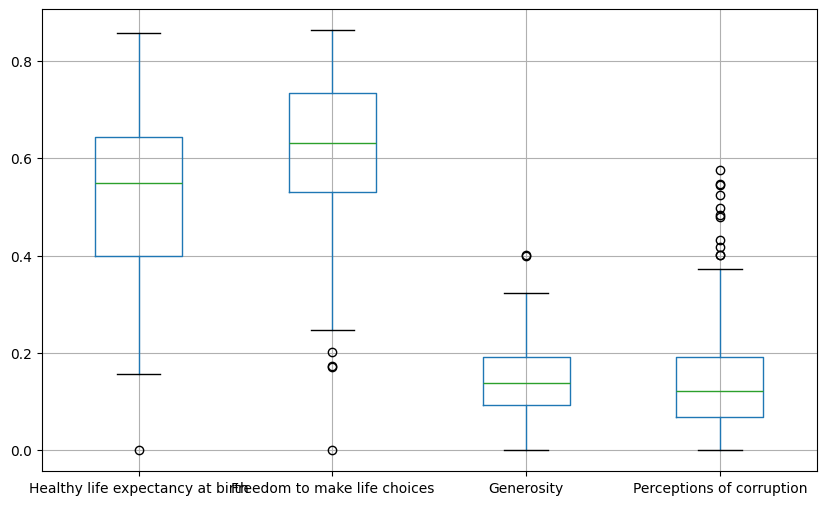

In [42]:
numeric_cols = ['Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption']
plt.figure(figsize=(10, 6))
happy_df[numeric_cols].boxplot()
plt.show()

We can see that perceptions of corruption has many outliers. Outliers probably reflect genuine socio-economic extremes so I have decided to keep it as removing them will remove the countries as well which are required for this analysis

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [43]:
df.info()
#I am using this sheet for reference but if I do end up using this for time-series analysis,  I might drop Positive affect and Negative afect
happy_df.info()
# I can probably get rid of upper whisker and lower whisker as these are just the upper and lower bounds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2354 non-null   float64
 4   Social support                    2362 non-null   float64
 5   Healthy life expectancy at birth  2313 non-null   float64
 6   Freedom to make life choices      2363 non-null   float64
 7   Generosity                        2354 non-null   float64
 8   Perceptions of corruption         2333 non-null   float64
 9   Positive affect                   2361 non-null   float64
 10  Negative affect                   2362 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
<class 'pa

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [44]:
happy_df["Log GDP per capita"].value_counts()
# There are some low values but they might represent the lower economic countries 
happy_df["Social support"].value_counts()
# there are countries with low social support so outliers like '0' seem valid-Afghanistan
happy_df["Healthy life expectancy at birth"].value_counts()
# there's one country with 0 value i'm gonna keep it-Lethoso
happy_df["Freedom to make life choices"].value_counts()
#one country with 0 value -Afghanistan
happy_df["Generosity"].value_counts()
#ok
happy_df["Perceptions of corruption"].value_counts()




Perceptions of corruption
0.123    3
0.078    3
0.154    3
0.043    2
0.368    2
        ..
0.109    1
0.072    1
0.053    1
0.085    1
0.088    1
Name: count, Length: 113, dtype: int64

In [45]:
print(df.columns)
print(happy_df.columns)

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')
Index(['Country name', 'Regional indicator', 'Life Ladder', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Dystopia + residual',
       'year'],
      dtype='object')


In [46]:
df.dtypes
happy_df.dtypes
happy_df["year"].unique()

array([2024])

In [47]:
df.to_csv('world_happiness_yearly_clean.csv', index=False)
happy_df.to_csv('world_happiness_2024_clean.csv', index=False)